In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

# Problem 1

In [2]:
def f(x,y):
    z = (y-x**2)**2 + (1.0-x)**2
    return z

In [3]:
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
X,Y = np.meshgrid(x,y)

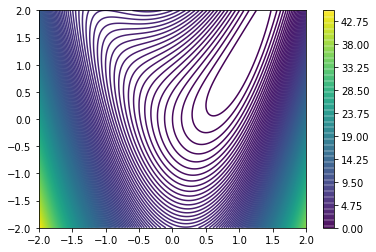

In [4]:
Z = f(X,Y)
plt.contour(X, Y, Z,200)
plt.colorbar()
plt.show()

# Problem 5

### b) plot $f(x,y)$

In [5]:
def f(x,y):
    z = 0.5*(0.8*x**2 +0.5*x*y + 0.7*y**2) + 1.55*x + 2.35*y + 0.5
    return z

In [6]:
x = np.linspace(-30,30,20)
y = np.linspace(-30,30,20)
X,Y = np.meshgrid(x,y)

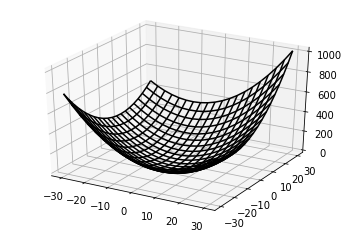

In [7]:
Z = f(X,Y)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
plt.show()

### c) Same plot but with contour

In [8]:
x = np.linspace(-5,0,400)
y = np.linspace(-5,0,400)
X,Y = np.meshgrid(x,y)

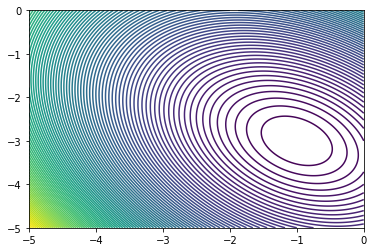

In [9]:
Z = f(X,Y)
plt.contour(X, Y, Z,100)
plt.show()

In [10]:
A = np.array([[1.6 , 0.5] , [0.5,1.4]])
b = np.array([-3.1,-4.7])
linalg.solve(A,-b)

array([1., 3.])

# Problem 6

In [11]:
def f(x,y):
    z = 0.5*(3*x**2 - 2*x*y + 3*y**2) + 5*x + y
    return z

In [12]:
x = np.linspace(-30,30,20)
y = np.linspace(-30,30,20)
X,Y = np.meshgrid(x,y)

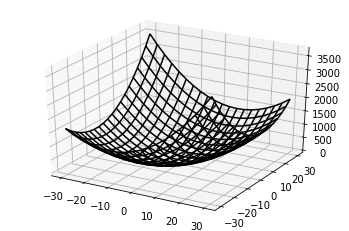

In [13]:
Z = f(X,Y)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
plt.show()

In [14]:
x = np.linspace(-3,3,400)
y = np.linspace(-3,3,400)
X,Y = np.meshgrid(x,y)

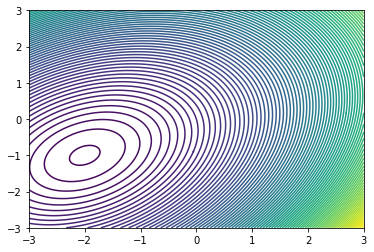

In [15]:
Z = f(X,Y)
plt.contour(X, Y, Z,100)
plt.show()

### e) Find the coordinate of the minimum

In [16]:
A = np.array([[3. , -1.] , [-1.,3.]])
b = np.array([5.,1.])
linalg.solve(A,-b)

array([-2., -1.])

# Problem 7

In [17]:
def gradf(x):
    dfdx = -4*x[0]*(x[1]-x[0]**2) - 2*(1.0-x[0])
    dfdy = 2*(x[1]-x[0]**2)
    g = np.array([dfdx , dfdy])
    return g

In [18]:
def Hf(x):
    dxdx = -4*x[1] + 12*x[0]**2 + 2
    dxdy = -4*x[0]
    dydy = 2
    hessian = np.array([[dxdx,dxdy],[dxdy,dydy]])
    return hessian

In [19]:
def newton(gradf,Hf,x0,num_iter):
    x = x0
    for i in range(0,num_iter):
        y = linalg.solve(Hf(x), - gradf(x))
        x = x + y
        print(x)
    return x

In [20]:
x0 = np.array([-1.,-1.])
newton(gradf,Hf,x0,10)

[-0.6  0.2]
[ 0.61212121 -1.09454545]
[0.71060571 0.49526128]
[0.99449304 0.90842439]
[0.99923558 0.99844925]
[0.99999997 0.99999935]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


array([1., 1.])

# Problem 9

In [21]:
def f(x,y):
    z = 0.5*(x-1.)**2 + 0.5*(y-1.)**2+ y*np.exp(-x)
    return z

### a) Plot the function

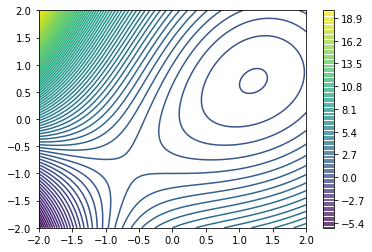

In [22]:
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X, Y, Z,100)
plt.colorbar()
plt.show()

### b) Newton's method to find the local min in the top corner

In [23]:
def gradf(x):
    dfdx = x[0] - 1. - x[1]*np.exp(-x[0])
    dfdy = x[1] - 1. + np.exp(-x[0])
    g = np.array([dfdx , dfdy])
    return g

In [24]:
def Hf(x):
    dxdx = 1. +  x[1]*np.exp(-x[0])
    dxdy =  - np.exp(-x[0])
    dydy = 1. 
    hessian = np.array([[dxdx,dxdy],[dxdy,dydy]])
    return hessian

In [25]:
x0 = np.array([0.5,0.5])
sol = newton(gradf,Hf,x0,10)

[1.28967539 0.87243168]
[1.21226411 0.70332386]
[1.20935433 0.70161138]
[1.20935346 0.70160986]
[1.20935346 0.70160986]
[1.20935346 0.70160986]
[1.20935346 0.70160986]
[1.20935346 0.70160986]
[1.20935346 0.70160986]
[1.20935346 0.70160986]


### Let us zoom  to check we do have the local min

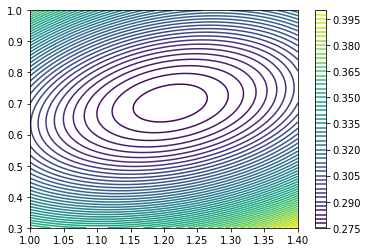

In [26]:
x = np.linspace(1,1.4,200)
y = np.linspace(0.3,1.,200)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X, Y, Z,50)
plt.colorbar()
plt.show()

### Value of $f(x,y)$ at the local min

In [27]:
xstar = sol[0]
ystar = sol[1]
f(xstar,ystar)

0.27578623654591394

### Value of $f(x,y)$ at the (-2,-2)

In [28]:
f(-2,-2)

-5.778112197861301

### c) Newton's method starting from (-5,-5)

In [29]:
x0 = np.array([-5,-5])
sol = newton(gradf,Hf,x0,1000)

[-4.0393314  -4.83729773]
[-3.1352349  -4.44620233]
[-2.33900186 -3.68542485]
[-1.69079285 -2.64838213]
[-1.19284984 -1.7230463 ]
[-0.8469643  -1.15626361]
[-0.67025956 -0.9203816 ]
[-0.62783174 -0.87180907]
[-0.62571014 -0.86956893]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518

[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518

[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518 -0.86956386]
[-0.62570518